# **QSAR Model prediciton of unknown Inhibitors**

Chanin Nantasenamat

*Data Professor YouTube channel, http://youtube.com/dataprofessor*

*Modified by quantaosun@gmail.com*

# Read in data

In [ ]:
import pandas as pd

In [6]:
dataset = pd.read_csv('/content/CLK1_bioactivity_data_3class_pIC50_pubchem_fp.csv')
dataset

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.031517
1,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.823909
2,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.677781
3,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.282329
4,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.223299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,1,1,1,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.886057
212,1,1,1,0,0,0,0,0,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.721246
213,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.698970
214,1,1,1,0,0,0,0,0,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.677781


In [7]:
X = dataset.drop(['pIC50'], axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,1,1,1,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
212,1,1,1,0,0,0,0,0,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
213,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
214,1,1,1,0,0,0,0,0,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
Y = dataset.iloc[:,-1]
Y

0      7.031517
1      4.823909
2      6.677781
3      6.282329
4      6.223299
         ...   
211    4.886057
212    7.721246
213    7.698970
214    7.677781
215    7.886057
Name: pIC50, Length: 216, dtype: float64

# Remove low variance features

In [9]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X

,PubchemFP2,PubchemFP12,PubchemFP16,PubchemFP18,PubchemFP19,PubchemFP23,PubchemFP33,PubchemFP37,PubchemFP145,PubchemFP150,PubchemFP153,PubchemFP180,PubchemFP181,PubchemFP186,PubchemFP187,PubchemFP188,PubchemFP192,PubchemFP258,PubchemFP260,PubchemFP261,PubchemFP286,PubchemFP287,PubchemFP293,PubchemFP294,PubchemFP299,PubchemFP300,PubchemFP338,PubchemFP341,PubchemFP342,PubchemFP346,PubchemFP352,PubchemFP353,PubchemFP357,PubchemFP358,PubchemFP359,PubchemFP362,PubchemFP364,PubchemFP366,PubchemFP367,PubchemFP372,...,PubchemFP658,PubchemFP659,PubchemFP661,PubchemFP662,PubchemFP666,PubchemFP671,PubchemFP672,PubchemFP674,PubchemFP680,PubchemFP682,PubchemFP684,PubchemFP688,PubchemFP689,PubchemFP691,PubchemFP692,PubchemFP695,PubchemFP696,PubchemFP697,PubchemFP698,PubchemFP699,PubchemFP702,PubchemFP703,PubchemFP704,PubchemFP712,PubchemFP713,PubchemFP714,PubchemFP716,PubchemFP734,PubchemFP735,PubchemFP737,PubchemFP758,PubchemFP761,PubchemFP776,PubchemFP777,PubchemFP779,PubchemFP797,PubchemFP798,PubchemFP800,PubchemFP821,PubchemFP824
0,0,1,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,1,0,1,0,1,1,0,0,0,0,0,1,1,0,0,...,0,0,0,1,1,1,1,0,1,0,1,1,1,1,1,1,0,1,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,1,0,0,1,0
1,1,1,1,1,1,0,1,0,1,1,1,1,1,0,1,1,1,1,0,0,1,0,1,0,1,0,1,0,0,0,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1,1,1,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,1,0,0,0,0,1,1,0
2,0,1,0,1,1,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0,0,1,1,1,0,0,1,1,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0
3,1,1,0,1,1,0,0,0,0,1,1,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,1,0,1,1,0,0,0,1,1,0,...,0,0,1,1,1,0,0,1,1,1,0,1,1,0,0,0,1,1,1,1,0,0,0,1,0,1,1,1,1,0,1,1,0,1,1,1,1,0,1,1
4,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,1,1,0,1,1,0,0,0,1,1,0,...,0,0,1,1,1,0,0,1,1,0,0,1,1,1,0,0,1,1,1,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,1,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,1,0,0,1,0,0,0,0,0,1,0,1,1,0,0,1,0,0,1,...,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,1,1,1,0,0,0,0,1,1,1,0,1,1,0,0,1,0,1,0,1,1,0,0,1,0
212,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
213,1,1,1,1,0,0,0,0,1,0,0,1,1,0,1,1,1,1,1,1,1,0,0,0,1,0,0,1,0,1,1,0,1,1,1,0,0,1,0,0,...,0,1,0,0,1,0,0,1,1,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
214,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
X.to_csv('descriptor_list.csv', index = False)

In [11]:
# In the app, use the following to get this same descriptor list
# of 218 variables from the initial set of 881 variables
Xlist = list(pd.read_csv('descriptor_list.csv').columns)
X[Xlist]

,PubchemFP2,PubchemFP12,PubchemFP16,PubchemFP18,PubchemFP19,PubchemFP23,PubchemFP33,PubchemFP37,PubchemFP145,PubchemFP150,PubchemFP153,PubchemFP180,PubchemFP181,PubchemFP186,PubchemFP187,PubchemFP188,PubchemFP192,PubchemFP258,PubchemFP260,PubchemFP261,PubchemFP286,PubchemFP287,PubchemFP293,PubchemFP294,PubchemFP299,PubchemFP300,PubchemFP338,PubchemFP341,PubchemFP342,PubchemFP346,PubchemFP352,PubchemFP353,PubchemFP357,PubchemFP358,PubchemFP359,PubchemFP362,PubchemFP364,PubchemFP366,PubchemFP367,PubchemFP372,...,PubchemFP658,PubchemFP659,PubchemFP661,PubchemFP662,PubchemFP666,PubchemFP671,PubchemFP672,PubchemFP674,PubchemFP680,PubchemFP682,PubchemFP684,PubchemFP688,PubchemFP689,PubchemFP691,PubchemFP692,PubchemFP695,PubchemFP696,PubchemFP697,PubchemFP698,PubchemFP699,PubchemFP702,PubchemFP703,PubchemFP704,PubchemFP712,PubchemFP713,PubchemFP714,PubchemFP716,PubchemFP734,PubchemFP735,PubchemFP737,PubchemFP758,PubchemFP761,PubchemFP776,PubchemFP777,PubchemFP779,PubchemFP797,PubchemFP798,PubchemFP800,PubchemFP821,PubchemFP824
0,0,1,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,1,0,1,0,1,1,0,0,0,0,0,1,1,0,0,...,0,0,0,1,1,1,1,0,1,0,1,1,1,1,1,1,0,1,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,1,0,0,1,0
1,1,1,1,1,1,0,1,0,1,1,1,1,1,0,1,1,1,1,0,0,1,0,1,0,1,0,1,0,0,0,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1,1,1,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,1,0,0,0,0,1,1,0
2,0,1,0,1,1,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0,0,1,1,1,0,0,1,1,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0
3,1,1,0,1,1,0,0,0,0,1,1,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,1,0,1,1,0,0,0,1,1,0,...,0,0,1,1,1,0,0,1,1,1,0,1,1,0,0,0,1,1,1,1,0,0,0,1,0,1,1,1,1,0,1,1,0,1,1,1,1,0,1,1
4,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,1,1,0,1,1,0,0,0,1,1,0,...,0,0,1,1,1,0,0,1,1,0,0,1,1,1,0,0,1,1,1,1,1,0,0,1,0,1,1,1,1,0,1,1,0,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,1,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,1,0,0,1,0,0,0,0,0,1,0,1,1,0,0,1,0,0,1,...,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,1,1,1,0,0,0,0,1,1,1,0,1,1,0,0,1,0,1,0,1,1,0,0,1,0
212,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
213,1,1,1,1,0,0,0,0,1,0,0,1,1,0,1,1,1,1,1,1,1,0,0,0,1,0,0,1,0,1,1,0,1,1,1,0,0,1,0,0,...,0,1,0,0,1,0,0,1,1,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
214,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Random Forest Regression Model

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X, Y)
r2 = model.score(X, Y)
r2

0.7677975610547718

In [14]:
X_unknown = pd.read_csv('/content/example_smile_with_descriptors_fp.csv')
X_unknown

,Unnamed: 0,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,...,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,0,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


The key thing now is to ensure the descriptor set is exactly the same as what we have used in builing the training set, i.e., the descriptor number and species should be all the same.

In [15]:
d_list = list(pd.read_csv('descriptor_list.csv').columns)
X_unknown[d_list]

,PubchemFP2,PubchemFP12,PubchemFP16,PubchemFP18,PubchemFP19,PubchemFP23,PubchemFP33,PubchemFP37,PubchemFP145,PubchemFP150,PubchemFP153,PubchemFP180,PubchemFP181,PubchemFP186,PubchemFP187,PubchemFP188,PubchemFP192,PubchemFP258,PubchemFP260,PubchemFP261,PubchemFP286,PubchemFP287,PubchemFP293,PubchemFP294,PubchemFP299,PubchemFP300,PubchemFP338,PubchemFP341,PubchemFP342,PubchemFP346,PubchemFP352,PubchemFP353,PubchemFP357,PubchemFP358,PubchemFP359,PubchemFP362,PubchemFP364,PubchemFP366,PubchemFP367,PubchemFP372,...,PubchemFP658,PubchemFP659,PubchemFP661,PubchemFP662,PubchemFP666,PubchemFP671,PubchemFP672,PubchemFP674,PubchemFP680,PubchemFP682,PubchemFP684,PubchemFP688,PubchemFP689,PubchemFP691,PubchemFP692,PubchemFP695,PubchemFP696,PubchemFP697,PubchemFP698,PubchemFP699,PubchemFP702,PubchemFP703,PubchemFP704,PubchemFP712,PubchemFP713,PubchemFP714,PubchemFP716,PubchemFP734,PubchemFP735,PubchemFP737,PubchemFP758,PubchemFP761,PubchemFP776,PubchemFP777,PubchemFP779,PubchemFP797,PubchemFP798,PubchemFP800,PubchemFP821,PubchemFP824
0,1,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0,1,1,0,0,1,0,0,1,...,0,1,0,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,1,0,0,0,0,0,1,...,0,1,0,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
X_pred=X_unknown[Xlist]
X_pred

,PubchemFP2,PubchemFP12,PubchemFP16,PubchemFP18,PubchemFP19,PubchemFP23,PubchemFP33,PubchemFP37,PubchemFP145,PubchemFP150,PubchemFP153,PubchemFP180,PubchemFP181,PubchemFP186,PubchemFP187,PubchemFP188,PubchemFP192,PubchemFP258,PubchemFP260,PubchemFP261,PubchemFP286,PubchemFP287,PubchemFP293,PubchemFP294,PubchemFP299,PubchemFP300,PubchemFP338,PubchemFP341,PubchemFP342,PubchemFP346,PubchemFP352,PubchemFP353,PubchemFP357,PubchemFP358,PubchemFP359,PubchemFP362,PubchemFP364,PubchemFP366,PubchemFP367,PubchemFP372,...,PubchemFP658,PubchemFP659,PubchemFP661,PubchemFP662,PubchemFP666,PubchemFP671,PubchemFP672,PubchemFP674,PubchemFP680,PubchemFP682,PubchemFP684,PubchemFP688,PubchemFP689,PubchemFP691,PubchemFP692,PubchemFP695,PubchemFP696,PubchemFP697,PubchemFP698,PubchemFP699,PubchemFP702,PubchemFP703,PubchemFP704,PubchemFP712,PubchemFP713,PubchemFP714,PubchemFP716,PubchemFP734,PubchemFP735,PubchemFP737,PubchemFP758,PubchemFP761,PubchemFP776,PubchemFP777,PubchemFP779,PubchemFP797,PubchemFP798,PubchemFP800,PubchemFP821,PubchemFP824
0,1,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0,1,1,0,0,1,0,0,1,...,0,1,0,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,1,0,0,0,0,0,1,...,0,1,0,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Model Prediction

In [17]:
Y_pred = model.predict(X)
Y_pred

array([6.85771992, 5.49282277, 6.71557765, 6.5139554 , 6.40900498,
       6.30248635, 6.65432683, 6.4796943 , 6.29439048, 7.57457398,
       7.57457398, 7.32109025, 7.43530123, 7.43907213, 7.12871731,
       7.12566759, 6.65432683, 6.97458929, 6.83614488, 7.57457398,
       6.94569209, 7.16330264, 6.8971454 , 7.32109025, 6.80672298,
       6.73063513, 6.86730471, 6.63704357, 6.86794263, 6.65550417,
       6.69847694, 6.46681646, 7.32179821, 7.00195021, 6.86966145,
       6.32143878, 6.86966145, 7.29912307, 6.81997126, 6.72388066,
       6.86966145, 7.14942982, 6.81997126, 6.40663218, 6.80416616,
       6.31448039, 6.31448039, 6.54410082, 6.86966145, 7.1475974 ,
       6.78207418, 6.86966145, 6.86966145, 6.86966145, 6.44583379,
       6.66786195, 6.35914315, 5.76161952, 6.43804493, 6.89625733,
       7.13955086, 6.46627578, 6.34664983, 6.71975511, 6.7746719 ,
       6.81531347, 6.89387766, 7.26092577, 7.0312487 , 7.01481087,
       6.71975511, 7.1986659 , 7.26092577, 7.7012939 , 7.49985

# Prediction for unknown smiles

In [18]:
Y_pred2 = model.predict(X_pred)
Y_pred2

array([6.7069109 , 6.70536893])

## Model Performance

In [19]:
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y, Y_pred))

Mean squared error (MSE): 0.10
Coefficient of determination (R^2): 0.77


# Data Visualization (Experimental vs Predicted pIC50 for Training Data)

In [20]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'Experimental pIC50')

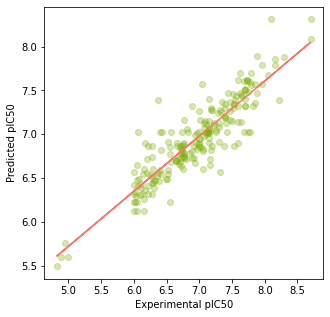

In [21]:
plt.figure(figsize=(5,5))
plt.scatter(x=Y, y=Y_pred, c="#7CAE00", alpha=0.3)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y, Y_pred, 1)
p = np.poly1d(z)

plt.plot(Y,p(Y),"#F8766D")
plt.ylabel('Predicted pIC50')
plt.xlabel('Experimental pIC50')